#introduction to machine learning
##pca analysis on MNIST dataset

داخل درس با آنالیز مولفه های اصلی آشنا شده اید ، در این تمرین قصد داریم از ابتدا این روش را روی دیتاست داده شده عملی کنیم و نتیایج این روش را با همدیگر مشاهده کنیم.

In [ ]:
first_name= "Alireza"
last_name= "Shokrani"
student_number= "99106255"

در بخش زیر تمامی کتابخانه هایی که لازم دارید را ایمپورت کنید.

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import decomposition as dcmp
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

### داده شده را لود کنید MNIST در این قسمت دیتا ست  

پیش از این که مولفه های اصلی داده ها را استخراج کنید آن را نرمالایز کنید.
توجه کنید که سمپل های لود شده به صورت 28*28  میباشند و باید آن را به صورت بردار 784 تایی تبدیل کنید

In [ ]:
#load the data set and fill nan value with 0
# TODO (load dataset)
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_total = np.concatenate((x_train, x_test), axis=0)
y_total = np.concatenate((y_train, y_test), axis=0)

11490434/11490434 [==============================] - 0s 0us/step


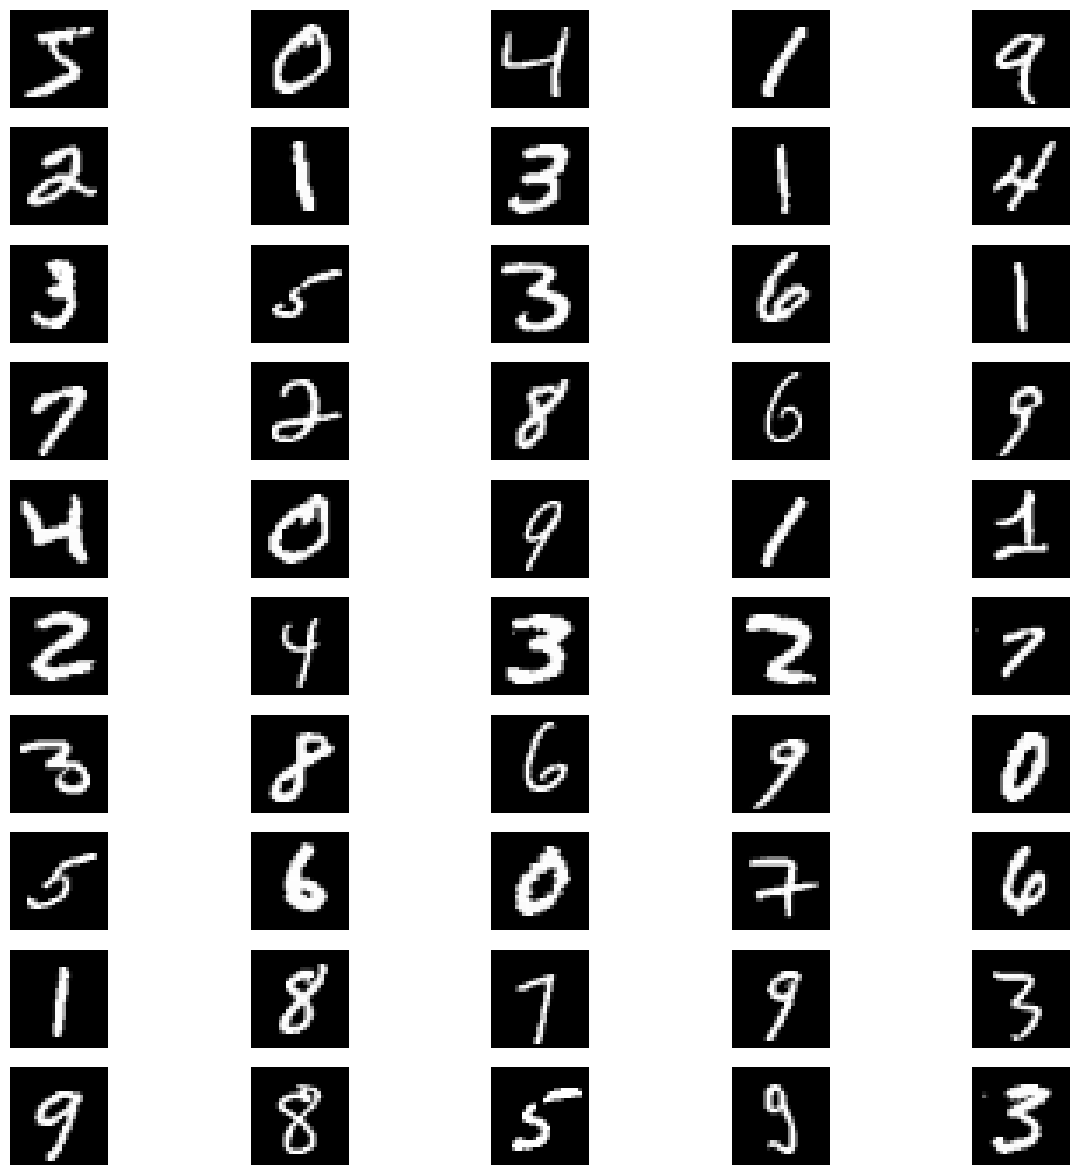

In [ ]:
# here show 50 first of this images

def show_images(num_images,X):
    # TODO (implement show images function)
    #inputs dataset and number of images wants to show
    #output plot images
    plot_w = 5
    plot_h = int(np.ceil(num_images/plot_w))
    plt.figure(figsize = (15,15))
    for i in range(num_images):
      plt.subplot(plot_h, plot_w, i+1)
      plt.imshow(X[i], 'gray')
      plt.axis('off')
show_images(50,x_total)

In [ ]:
#TODO scale the data set to [0 1]
#divide data to maximum value .
X = x_total.reshape(len(x_total), -1)
X = X / 255

در این قسمت ابتدا تابع کواریانس داده را بدست آورید و سپس مقادیر ویژه و بردار ویژه های آن را استخراج کنید.

In [ ]:
#TODO calculate the covariance matrix and the eigenvalue and eigenvectors of the covariance matrix.
C = np.cov(X.T)
eigenvalues, eigenvectors = np.linalg.eig(C)
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

در بخش زیر میخواهیم تعدادی از مولفه های اصلی را استخراج کنیم که بخش قابل قبولی از واریانس داده ها را شامل شده باشند.

In [ ]:
explained_variance = 0.9 # you can change this variable to get more component of datasets.
#calculate the total variance from eigenvalues and find the first k component that contains the explained_variance of the total variance.
#TODO
k = 0
sum_var = 0
while sum_var / np.real(np.sum(eigenvalues)) < explained_variance:
  sum_var += eigenvalues[k]
  k += 1

V = eigenvectors[:,0:k]

#calculate the compression_ratio
print(k/len(C))

0.11096938775510204


حال در این بخش دیتاهای موجود را روی این مولفه ها تصویر کنید عملیات کاهش بعدد را انجام دهید و سپس ابعاد را به اندازه تصاویر اصلی برگردانید و  تصویر یکی از سمپل ها را برای هر دو حالت قبل از کاهش بعد روی مولفه ها و بعد از آن رسم کنید.

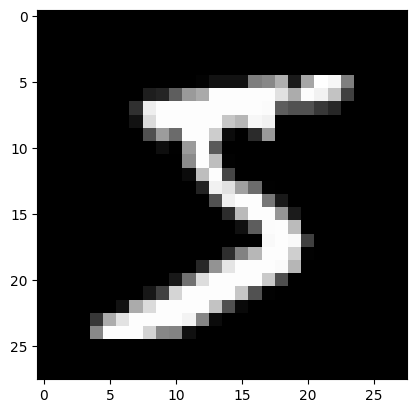

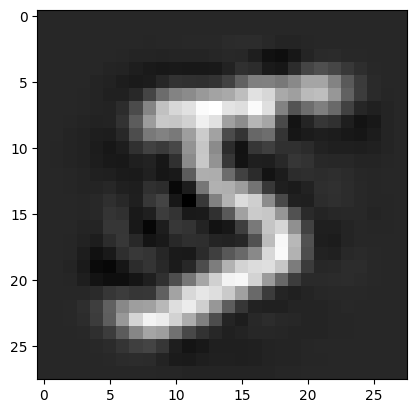

In [ ]:
#Project Images into Reduced Dimensionality Eigenbasis F=X*V (X is our dataset,F our reduced dimensionality dataset,V is k choosen eigenvectors)
#And Reproject Images to Standard Basis for plotting the reduced component image X_k=F*V_transpose (V_transpose is equal to V inverse)
#select on sample and reshape it to a 28 by 28 matrix and plot them as image

#TODO
#plot the dimentionally reduced data
#plot the original data
F = X @ V
X_k = F @ V.T
plt.figure()
plt.imshow(x_total[0], 'gray')
plt.figure()
plt.imshow(np.real(X_k[0]*255).reshape(28,28), 'gray')

## Perform PCA and Gauge Max Accuracy

حال میخواهیم برای دیتای تصویر شده یک مدل یادگیری بسازیم و دقت مدل را برحسب تعدا مولفه های اصلی بدست بیاوریم .

In [ ]:
#complete below function using python PCA function
def do_pca(n_components, data):
  #input number of component and not normalized data set.
  #output is the projected dataset
  # TODO
  pca = dcmp.PCA(n_components)
  output = data.reshape(len(data), -1)
  output = output / 255
  output = pca.fit_transform(output)
  return output

In [ ]:
#define a function that gets the X data and Y labels and returns the accuracy of ml model.

def ML_model(X, y, print_output=True):
    #define ML model inputs dataset and lables
    #output accuracy of model on dataset
    # TODO
    # We use Gaussian Naive Bayes (NB) classifier
    gnb = GaussianNB()
    gnb.fit(X, y)
    pred = gnb.predict(X)
    acc = accuracy_score(y, pred)
    return acc

In [ ]:

#your code to plot the accuracy of projected train data on one ml model(choose on your own reggression , random forest , ...)
#consider number of component from 2 to 101 and calculate accuracy based on number of components
#TODO
acc_list, pc_list = [], []
for pc in range(2,101):
    #TODO
    pc_list.append(pc)
    acc_list.append(ML_model(do_pca(pc, x_train), y_train))
    print(pc)

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


Text(0.5, 1.0, 'Gaussian Naive Bayes Classifier')

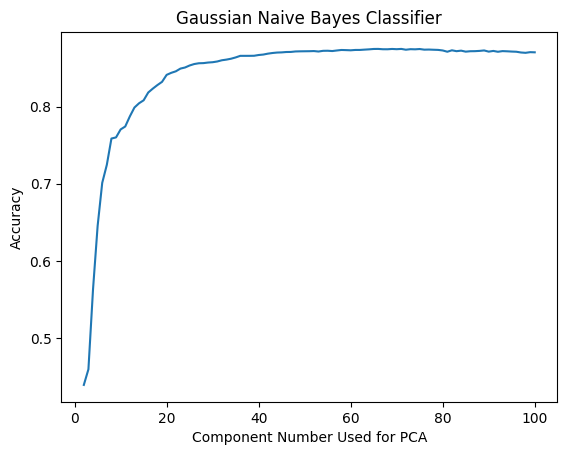

In [ ]:
#plot the accuracy based on components.
#TODO
plt.plot(pc_list, acc_list)
plt.xlabel('Component Number Used for PCA')
plt.ylabel('Accuracy')
plt.title('Gaussian Naive Bayes Classifier')

In [ ]:
#print the number of components that maximize the accuracy and the max accuracy
#TODO
mx_idx = np.argmax(acc_list)
print('maximum accuracy = '+str(acc_list[mx_idx]))
print('at component number : '+str(pc_list[mx_idx]))

maximum accuracy = 0.8746333333333334
at component number : 66
